In [1]:
#Importing Relevant Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px

In [11]:
#Load Data Into DataFrame
df = pd.read_csv(r"C:\Users\USER\OneDrive\VS Code Repos\EIU codebase\EIU-codebase\Data\tomato_retail_sales_clean.csv", parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     5052 non-null   datetime64[ns]
 1   Quantity Sold (kg)       5052 non-null   int64         
 2   Unit Price (NGN)         5052 non-null   float64       
 3   Total Sales Value (NGN)  5052 non-null   int64         
 4   Opening Stock (kg)       5052 non-null   int64         
 5   Closing Stock (kg)       5052 non-null   int64         
 6   Restocked Quantity (kg)  5052 non-null   int64         
 7   Supplier Name            5052 non-null   object        
 8   Supplier Cost (NGN)      5052 non-null   int64         
 9   Transport Cost (NGN)     5052 non-null   int64         
 10  Store Location           5052 non-null   object        
 11  Season                   5052 non-null   object        
dtypes: datetime64[ns](1), float64(1), 

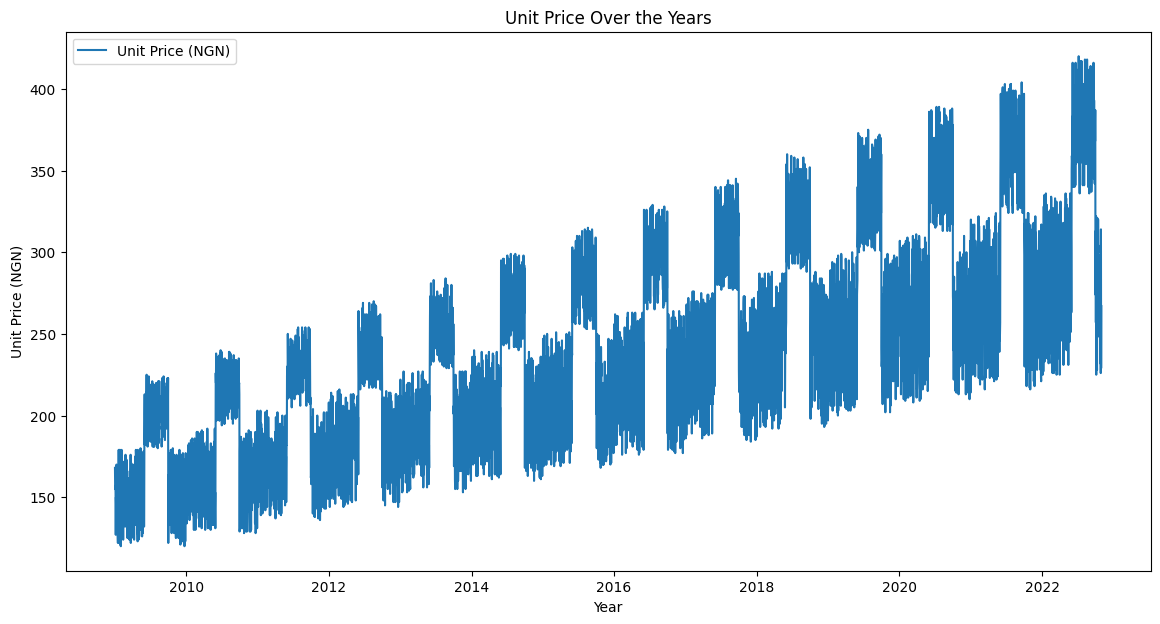

In [12]:
# Set the Date column as the index
df.set_index("Date", inplace=True)

# Plotting Unit Price over the years
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Unit Price (NGN)'], label='Unit Price (NGN)')
plt.xlabel('Year')
plt.ylabel('Unit Price (NGN)')
plt.title('Unit Price Over the Years')
plt.legend()
plt.show()

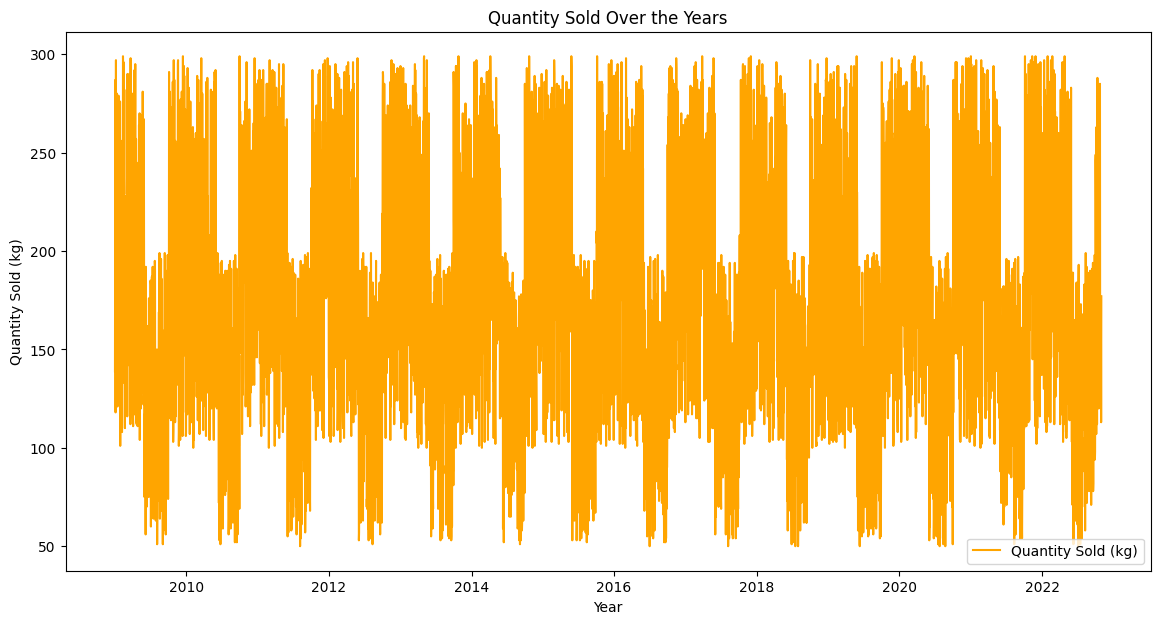

In [4]:

# Plotting Quantity Sold over the years
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Quantity Sold (kg)'], label='Quantity Sold (kg)', color='orange')
plt.xlabel('Year')
plt.ylabel('Quantity Sold (kg)')
plt.title('Quantity Sold Over the Years')
plt.legend()
plt.show()

CONCLUSION:
    1. From the First Time Series plot, it is evident that there is a steady increase in unit price of good 
       over the years.
    2. From The Second Time series plot, it is evident that there is a fairly constant supply in the 
       Quantity of goods sold.

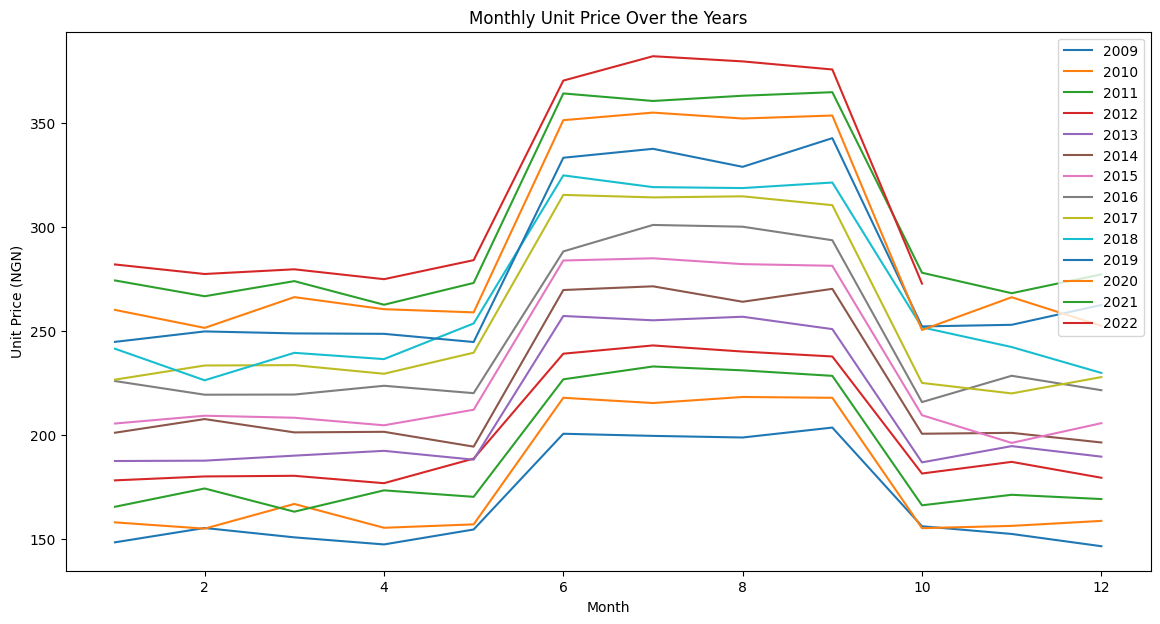

In [16]:
# Extract month and year from the Date index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Select only numeric columns for grouping
numeric_columns = df.select_dtypes(include='number').columns

# Group by Year and Month and calculate the mean for each group
monthly_data = df.groupby(['Year', 'Month'])[numeric_columns].mean()

# Drop the existing 'Month' and 'Year' columns to avoid duplication
monthly_data = monthly_data.drop(columns=['Month', 'Year'])

# Reset the index to make plotting easier
monthly_data.reset_index(inplace=True)

# Plotting Unit Price over the months and years
plt.figure(figsize=(14, 7))
for year in monthly_data['Year'].unique():
    yearly_data = monthly_data[monthly_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Unit Price (NGN)'], label=f'{year}')
plt.xlabel('Month')
plt.ylabel('Unit Price (NGN)')
plt.title('Monthly Unit Price Over the Years')
plt.legend()
plt.show()



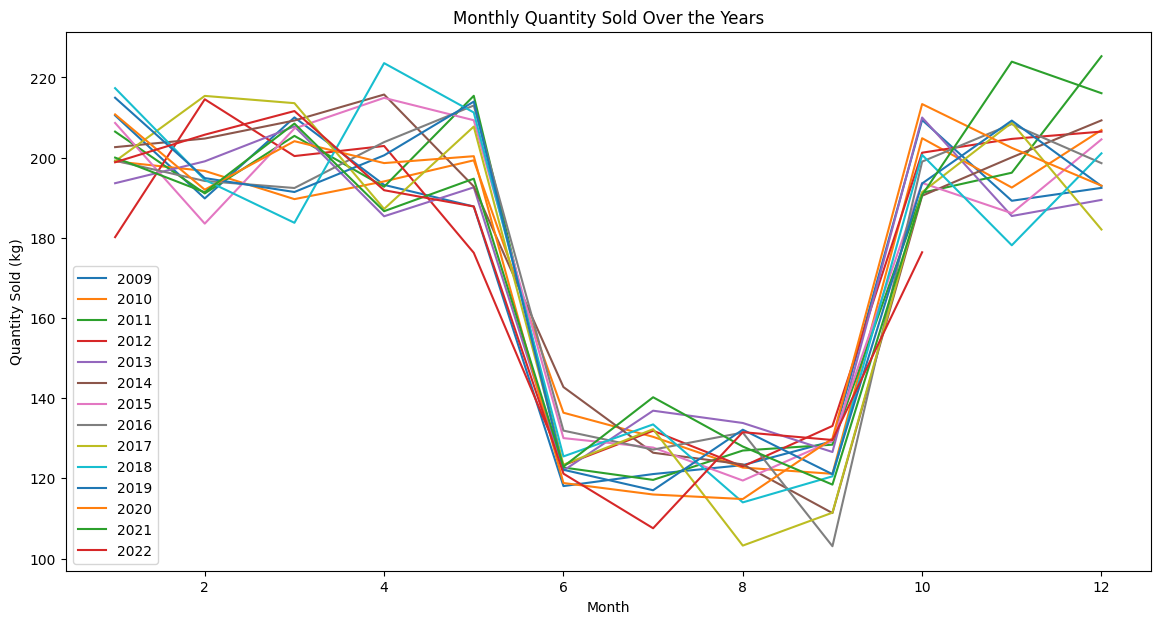

In [17]:
# Plotting Quantity Sold over the months and years
plt.figure(figsize=(14, 7))
for year in monthly_data['Year'].unique():
    yearly_data = monthly_data[monthly_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Quantity Sold (kg)'], label=f'{year}')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (kg)')
plt.title('Monthly Quantity Sold Over the Years')
plt.legend()
plt.show()

CONCLUSION:
    1. From the Third Time series plot i can see that-There is a Sharp increase in monthly unit price over the years, Especially through the months of MAY - OCTOBER
    2. From the Fourth Time Series plot i can see that-There is a Sharp decrease in monthly quantity sold over the years, Especially through the months of JUNE - SEPTEMBER.